# An algorithm for Heart disease/ Heart attack risk prediction with maximuim efficiency

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('heart_dataset.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## This dataset is a combination of five publicly available heart disease datasets, with a total of 1,888 records. Merging these datasets provides a foundation for our training machine learning model aimed at predicting heart attack risk.

In [3]:
print(data.shape)
print(data.isnull().sum())    # To check if there are any missing values

(1888, 14)
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalachh    0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


## Feature Descriptions:
- age: Age of the patient (Numeric).
- sex: Gender of the patient. Values: 1 = male, 0 = female.
- cp: Chest pain type. Values: 0 = Typical angina, 1 = Atypical angina, 2 = Non-anginal pain, 3 = Asymptomatic.
- trestbps: Resting Blood Pressure (in mm Hg) (Numeric).
- chol: Serum Cholesterol level (in mg/dl) (Numeric).
- fbs: Fasting blood sugar > 120 mg/dl. Values: 1 = true, 0 = false.
- restecg: Resting electrocardiographic results. Values: 0 = Normal, 1 = ST-T wave abnormality, 2 = Left ventricular hypertrophy.
- thalach: Maximum heart rate achieved (Numeric).
- exang: Exercise-induced angina. Values: 1 = yes, 0 = no.
- oldpeak: ST depression induced by exercise relative to rest (Numeric).
- slope: Slope of the peak exercise ST segment. Values: 0 = Upsloping, 1 = Flat, 2 = Downsloping.
- ca: Number of major vessels (0-3) colored by fluoroscopy. Values: 0, 1, 2, 3.
- thal: Thalassemia types. Values: 1 = Normal, 2 = Fixed defect, 3 = Reversible defect.
- target: Outcome variable (heart attack risk). Values: 1 = more chance of heart attack, 0 = less chance of heart attack.

# The Correlation among all columns

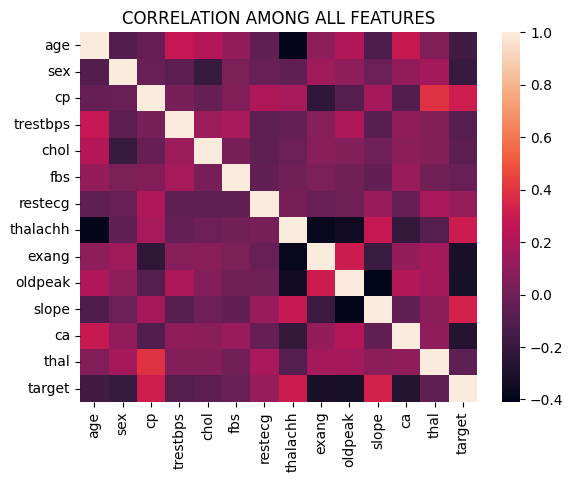

In [4]:
relation = data.corr()
sns.heatmap(relation)
plt.title('CORRELATION AMONG ALL FEATURES')
plt.show()

## Compare Outcome based on all the available factors

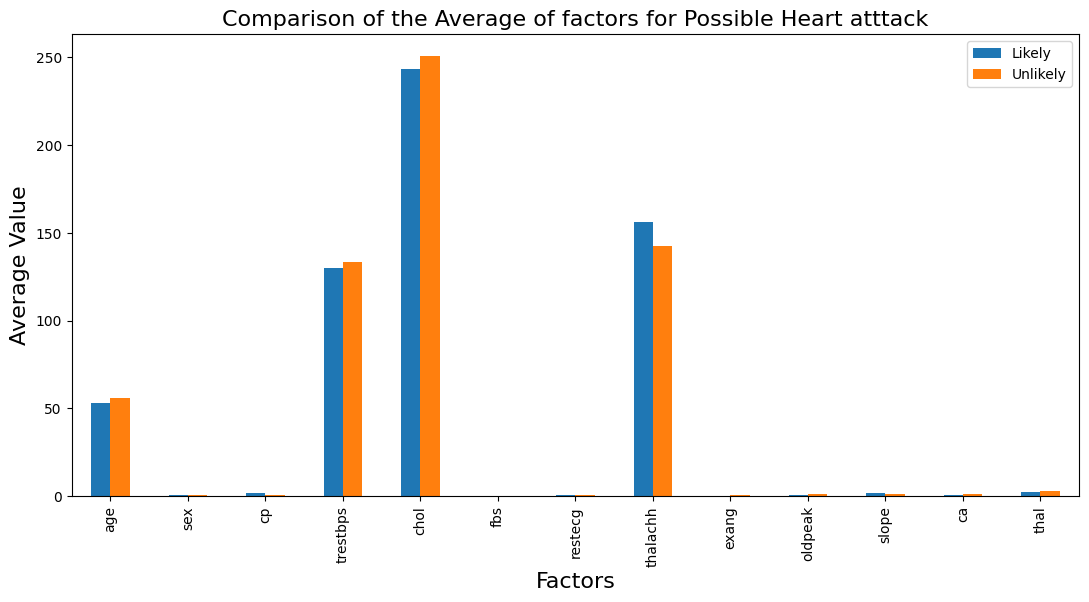

In [5]:
data['target'] = data['target'].astype(str)                      # Change the target column to string for comaprision reasons
numeric_columns = data.select_dtypes(include=['number']).columns
# Calculate average stats for Heart diseases Prediction
Likely_stats = data[data['target'] == '1'][numeric_columns].mean()
Unlikely_stats = data[data['target'] == '0'][numeric_columns].mean()

# Plot comparison of average stats for Heart diseases Prediction
relation2 = pd.DataFrame({'Likely': Likely_stats, 'Unlikely':Unlikely_stats})

relation2.plot(kind='bar',figsize = (13,6))
plt.title('Comparison of the Average of factors for Possible Heart atttack', fontsize=16)
plt.xlabel('Factors', fontsize=16)
plt.ylabel('Average Value', fontsize=16)
plt.show()

data['target'] = data['target'].astype(int)                   # Change the target column back to integer for prediction

# We can see that each variable is related to other variables in the dataset, so all the columns are important for our prediction

## Performing Random forest Machine learning to predict the 'Heart attack risk' outcome

### Importing the Libraries

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [7]:
# Defining our independent (x) and dependent variables (y)
x = data.drop(['target'], axis = 1)
y =  data['target']

## Splitting data into training and testing sets

In [8]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state = 0)

In [9]:
#To perform Random Forest
random = RandomForestClassifier()
random.fit(x_train,y_train)

RandomForestClassifier()

In [10]:
y_pred = random.predict(x_test)
y_pred

array([1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,

In [11]:
# To check accuracy
tn, fp, tp, fn = metrics.confusion_matrix(y_test,y_pred).ravel()

In [12]:
print(f'True positives: {tp}')
print(f'False positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

print(f'Accuracy Score = {metrics.accuracy_score(y_test, y_pred)}')
print(f'Precision Score = {metrics.precision_score(y_test, y_pred)}')
print(f'Recall Score = {metrics.recall_score(y_test, y_pred)}\n')


True positives: 9
False positives: 6
True Negatives: 176
False Negatives: 187
Accuracy Score = 0.9603174603174603
Precision Score = 0.9689119170984456
Recall Score = 0.9540816326530612



In [13]:
# Our model is very accurate

# Random forest is all about an average of various 'decision trees' to give a more stable prediction

## Example testing the model on random sample data

In [18]:
sample = [[76,1,1,90,336,1,1,178,0,0.8,2,1,2]]
prediction = random.predict(sample)
if (prediction == [0]):
    print('The person does not have a heart Attack risk')
else:
    print('The person has a heart Attack risk')

The person has a heart Attack risk


C:\Users\oshev\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
